## Национальный Технический Университет Украины “КПИ им. Игоря Сикорского”
## Учебно-научный комплекс «Институт прикладного системного анализа»


### ЛAБОРАТОРНАЯ РОБОТА № 1 по Системному Анализу


#### Студетна 4 курса группы КА-41 Барзия Ильи

#### Задание 1
При заданных целевых функциях $f_1(x)$ , $f_2(x)$ 
и пороговых ограничениях $f_1^*$, $f_2^*$
определить область Парето на заданном интервале $[ x_1 , x_2 ]$
при выполнении условий $f_1(x) \geq f_1^*$ , $f_2(x) \geq f_2^*$. 

Сузить область Парето, используя приемы технических ограничений.  

При решении уравнений все вычисления провести с точностью до 0.0001, при сужении интервалов значения границ округлить до 0.001 и шаг сетки брать
равным не более 0.001.

$f_1(x) = -5 + 1,6x + 1,6x^2$  
$f_2(x) = 275,6 - 0,5x^2$

$f^*_1 = 101$  
$f^*_2 = 163$

$x_1 = 5$  
$x_2 = 20$

Спочатку визначимо множину Парето на інтервалі [x_1,x_2], де справедливі нерівності

$\frac{f_1(x)}{101} \geq 1$  
$\frac{f_2(x)}{163} \geq 1$



In [16]:
import math as m
import itertools as it
import functools as ft
import operator as o
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

#function to return each n-th element
def every(n,l):
    return map(o.itemgetter(1), filter(lambda x: not (x[0] % n), enumerate(l)))

#setting given functions
def f1(x):
    return -5 + 1.6 * x + 1.6 * (x * x)
def f2(x):
    return 275.6 - 0.5 * (x * x)
def t(x):
    return (round(f1(x) / F1,3) , round(f2(x) / F2, 3), x)
def an(x):
        return (f1(x) / F1, f2(x) / F2)
F1, F2 = 101 , 163
x1, x2 = 5 , 20
STEP = 0.001

def first():
    steps = int((x2 - x1)/STEP) + 1
    set1 = [(x1 + x * STEP) for x in range(steps)]
    set2 = [f1(x) for x in set1]
    set3 = [f2(x) for x in set1]
    set4 = [101 for x in set1]
    set5 = [163 for x in set1]
    par1 = filter(lambda x: f2(x) / F2 >= 1, set1)
    par = filter(lambda x: f1(x) / F1 >= 1 ,par1)
    #print(par)
    x = np.array(range(x1,x2))   
    itr= set(map(t,par))
    #print(sorted(itr))
    minmax = ft.reduce(ft.partial(min, key=o.itemgetter(0)),
                       map(lambda y: (max(y[0], y[1]), y[2]),itr))
    maxmin = ft.reduce(ft.partial(max, key=o.itemgetter(1)),
                       map(lambda y: (min(y[0], y[1]), y[2]),itr))
    return(minmax, maxmin)


matplotlib.rcParams.update({'font.size': 50})
fst = o.itemgetter(0)
snd = o.itemgetter(1)
'''
plt.figure(figsize=(30, 30))
#for splt in ([(x,y) for y in x2] for x in every(30, sorted(x1))):
plt.plot(set1, set2,'o', label="f1(x)")
plt.plot(set1, set3,'o', label="f2(x)")
plt.plot(set1, set4,'o', label="f1*")
plt.plot(set1, set5,'o', label="f2*")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x2')
plt.ylabel('F12(x1,x2)')
plt.show()
plt.close()
'''

'\nplt.figure(figsize=(30, 30))\n#for splt in ([(x,y) for y in x2] for x in every(30, sorted(x1))):\nplt.plot(set1, set2,\'o\', label="f1(x)")\nplt.plot(set1, set3,\'o\', label="f2(x)")\nplt.plot(set1, set4,\'o\', label="f1*")\nplt.plot(set1, set5,\'o\', label="f2*")\nplt.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nplt.xlabel(\'x2\')\nplt.ylabel(\'F12(x1,x2)\')\nplt.show()\nplt.close()\n'

#### Ответ:

In [17]:
ans = first()

print("Ответ к заданию 1:")
print("x = "+str(ans[0][1])+"\nminmax = "+str(ans[0][0])+"\nf1/f*1 = {z[0]}\nf2/f*2 = {z[1]}\n".format(z=an(ans[0][1])))
print("x = "+str(ans[1][1])+"\nmaxmin = "+str(ans[1][0])+"\nf1/f*1 = {z[0]}\nf2/f*2 = {z[1]}".format(z=an(ans[1][1])))

Ответ к заданию 1:
x = 9.18
minmax = 1.432
f1/f*1 = 1.4309291089108909
f2/f*2 = 1.4322932515337425

x = 15.006
maxmin = 1.0
f1/f*1 = 3.7554223524752475
f2/f*2 = 1.000061239263804


#### Задание 2

Рассматривается задача раскрытия неопределенности противодействий двух
субъектов. Каждая сторона имеет свою целевую функцию: субъект 1 - $f_{12} (x_1 , x_2 )$ , субъект 2 - $f_{21} ( x_1 , x_2 )$ .

Субъекты действует независимо - каждый не знает ни целевой функции, ни параметров противоположной стороны.

Требуется:

1. Определить гарантированный результат 
 $f_{12}^*$ , $f_{21}^*$ каждого субъекта табличным, графическим и классическим методами.

2. Найти область Парето из условия: $f_{12}(x_1 , x_2) \geq f_{12}^*$,
 $f_{21}(x_1 , x_2) \geq f_{21}^*$

3. Определить оптимальные значения $x_1^*$, $x_2^*$, при которых
 $\Delta_i = \left |f_i(x_1^*, x_2^*) - f_i^*\right |, i = 1,2$ принимает минимальное значение 
 $\Delta \to 0$

Целевые функции игроков:

$f_{12} (x_1 , x_2 ) = cos(x_1) - x_2$  
$f_{21} (x_1 , x_2 ) = sin(x_1) + x_2$

Шаг сетки:  
$x_1  :0.01$  
$x_2  :0.01$

Диапазоны изменения переменных:  
 $x_1 ∈ [ 0 , 3 ]$  
 $x_2 ∈ [-2 , 2 ]$
 
 
 ###### Табличний метод

In [100]:
def F12(x):
    return m.cos(x[0]) - x[1]
def F21(x):
    return m.sin(x[0]) + x[1]
def F211(x):
    return m.sin(x[1]) + x[0]

st = (0.01, 0.01)
ed = ((0,3),(-2,2))
stx1 = int((ed[0][1] - ed[0][0])/st[0]) + 1
stx2 = int((ed[1][1] - ed[1][0])/st[1]) + 1

x1 = {(ed[0][0] + x * st[0]) for x in range(stx1)}
x2 = {(ed[1][0] + x * st[1]) for x in range(stx2)}
f12 = ft.reduce(ft.partial(max, key=o.itemgetter(0)),map(lambda il:ft.reduce(ft.partial(min, key=o.itemgetter(0)),
                                            map(lambda x: (F12(x),x), il)),(((x,y) for y in x2) for x in x1)))
f21 = ft.reduce(ft.partial(max, key=o.itemgetter(0)),map(lambda il:ft.reduce(ft.partial(min, key=o.itemgetter(0)),
                                            map(lambda x: (F21(x),x), il)),(((y, x) for y in x1) for x in x2)))

#### Ответ:

In [101]:
print("Ответ к заданию 2:")
print("\nmax(x1)min(x2)(F12) = "+str(f12[0])+"\nx1 = "+str(f12[1][0])+"\nx2 = "+str(f12[1][1]))
print("\nmax(x2)min(x1)(F21) = "+str(f21[0])+"\nx1 = "+str(f21[1][0])+"\nx2 = "+str(f21[1][1]))

Ответ к заданию 2:

max(x1)min(x2)(F12) = -1.0
x1 = 0.0
x2 = 2.0

max(x2)min(x1)(F21) = 2.0
x1 = 0.0
x2 = 2.0


###### Класичний метод
Далее найдем гарантированные результаты $f_{12}^*$ , $f_{21}^*$ классическим методом, который базируется на исследовании экстремальных свойств функций.

Сначала исследуем функцию $f_{12}(x_1, x_2)$ : 

$\frac{\partial{f_{12}}}{\partial{x_2}} = - 1$ 

Итак, $f_{12}(x_1, x_2)$ по $x_2$ не имеет экстремума, но достигает минимума на правом концке отрезка ($x_2=2$), так как  
$f_{12}(x_1, 2) = cos(x_1) - 2 < cos(x_1) - x_2 = f_{12}(x_1, x2)$  $\forall x_2 ∈ [-2 , 2 )$
 
 
Нужно найти значение $x_1$, при котором функция достигает максимума. В $f_{12}(x_1, x_2)$ подставим полученное значение $x_2=2$, возьмем производную по $x_1$ и прировняем к нулю:

$\frac{\partial{f_{12}(x_1,2)}}{\partial{x_2}} = - sin(x_1) = 0$

откуда имеем $x_1=0$. По характеру поведения функции выходит, что в точке $x_1=0$ будет максимум. Итак,

$\max_{x_1}\min_{x_2} f_{12}(x_1, x_2) = f_{12}^*(0;2)=-1$

Тепер исследуем функцию $f_{21}(x_1, x_2)$ : 

$\frac{\partial{f_{12}}}{\partial{x_1}} = cos(x_1) = 0$

По характеру поведения функции выходит, что в точке $x_1=0$ будет минимум. В $f_{21}(x_1, x_2)$ подставим полученное значение $x_1=0$, возьмем производную по $x_2$:

$\frac{\partial{f_{21}(0,x_2)}}{\partial{x_2}} = 1 $

Итак, $f_{21}(x_1, x_2)$ по $x_2$ не имеет экстремума, но достигает максимума на правом концке отрезка 
$f_{21}(0, 2) = cos(0) - 2 = 2 > x_2 = f_{12}(0, x2)$  $\forall x_2 ∈ [-2 , 2 )$
Итак,

$\max_{x_2}\min_{x_1} f_{21}(x_1, x_2) = f_{21}^*(0;2)=2$


###### Графічний метод

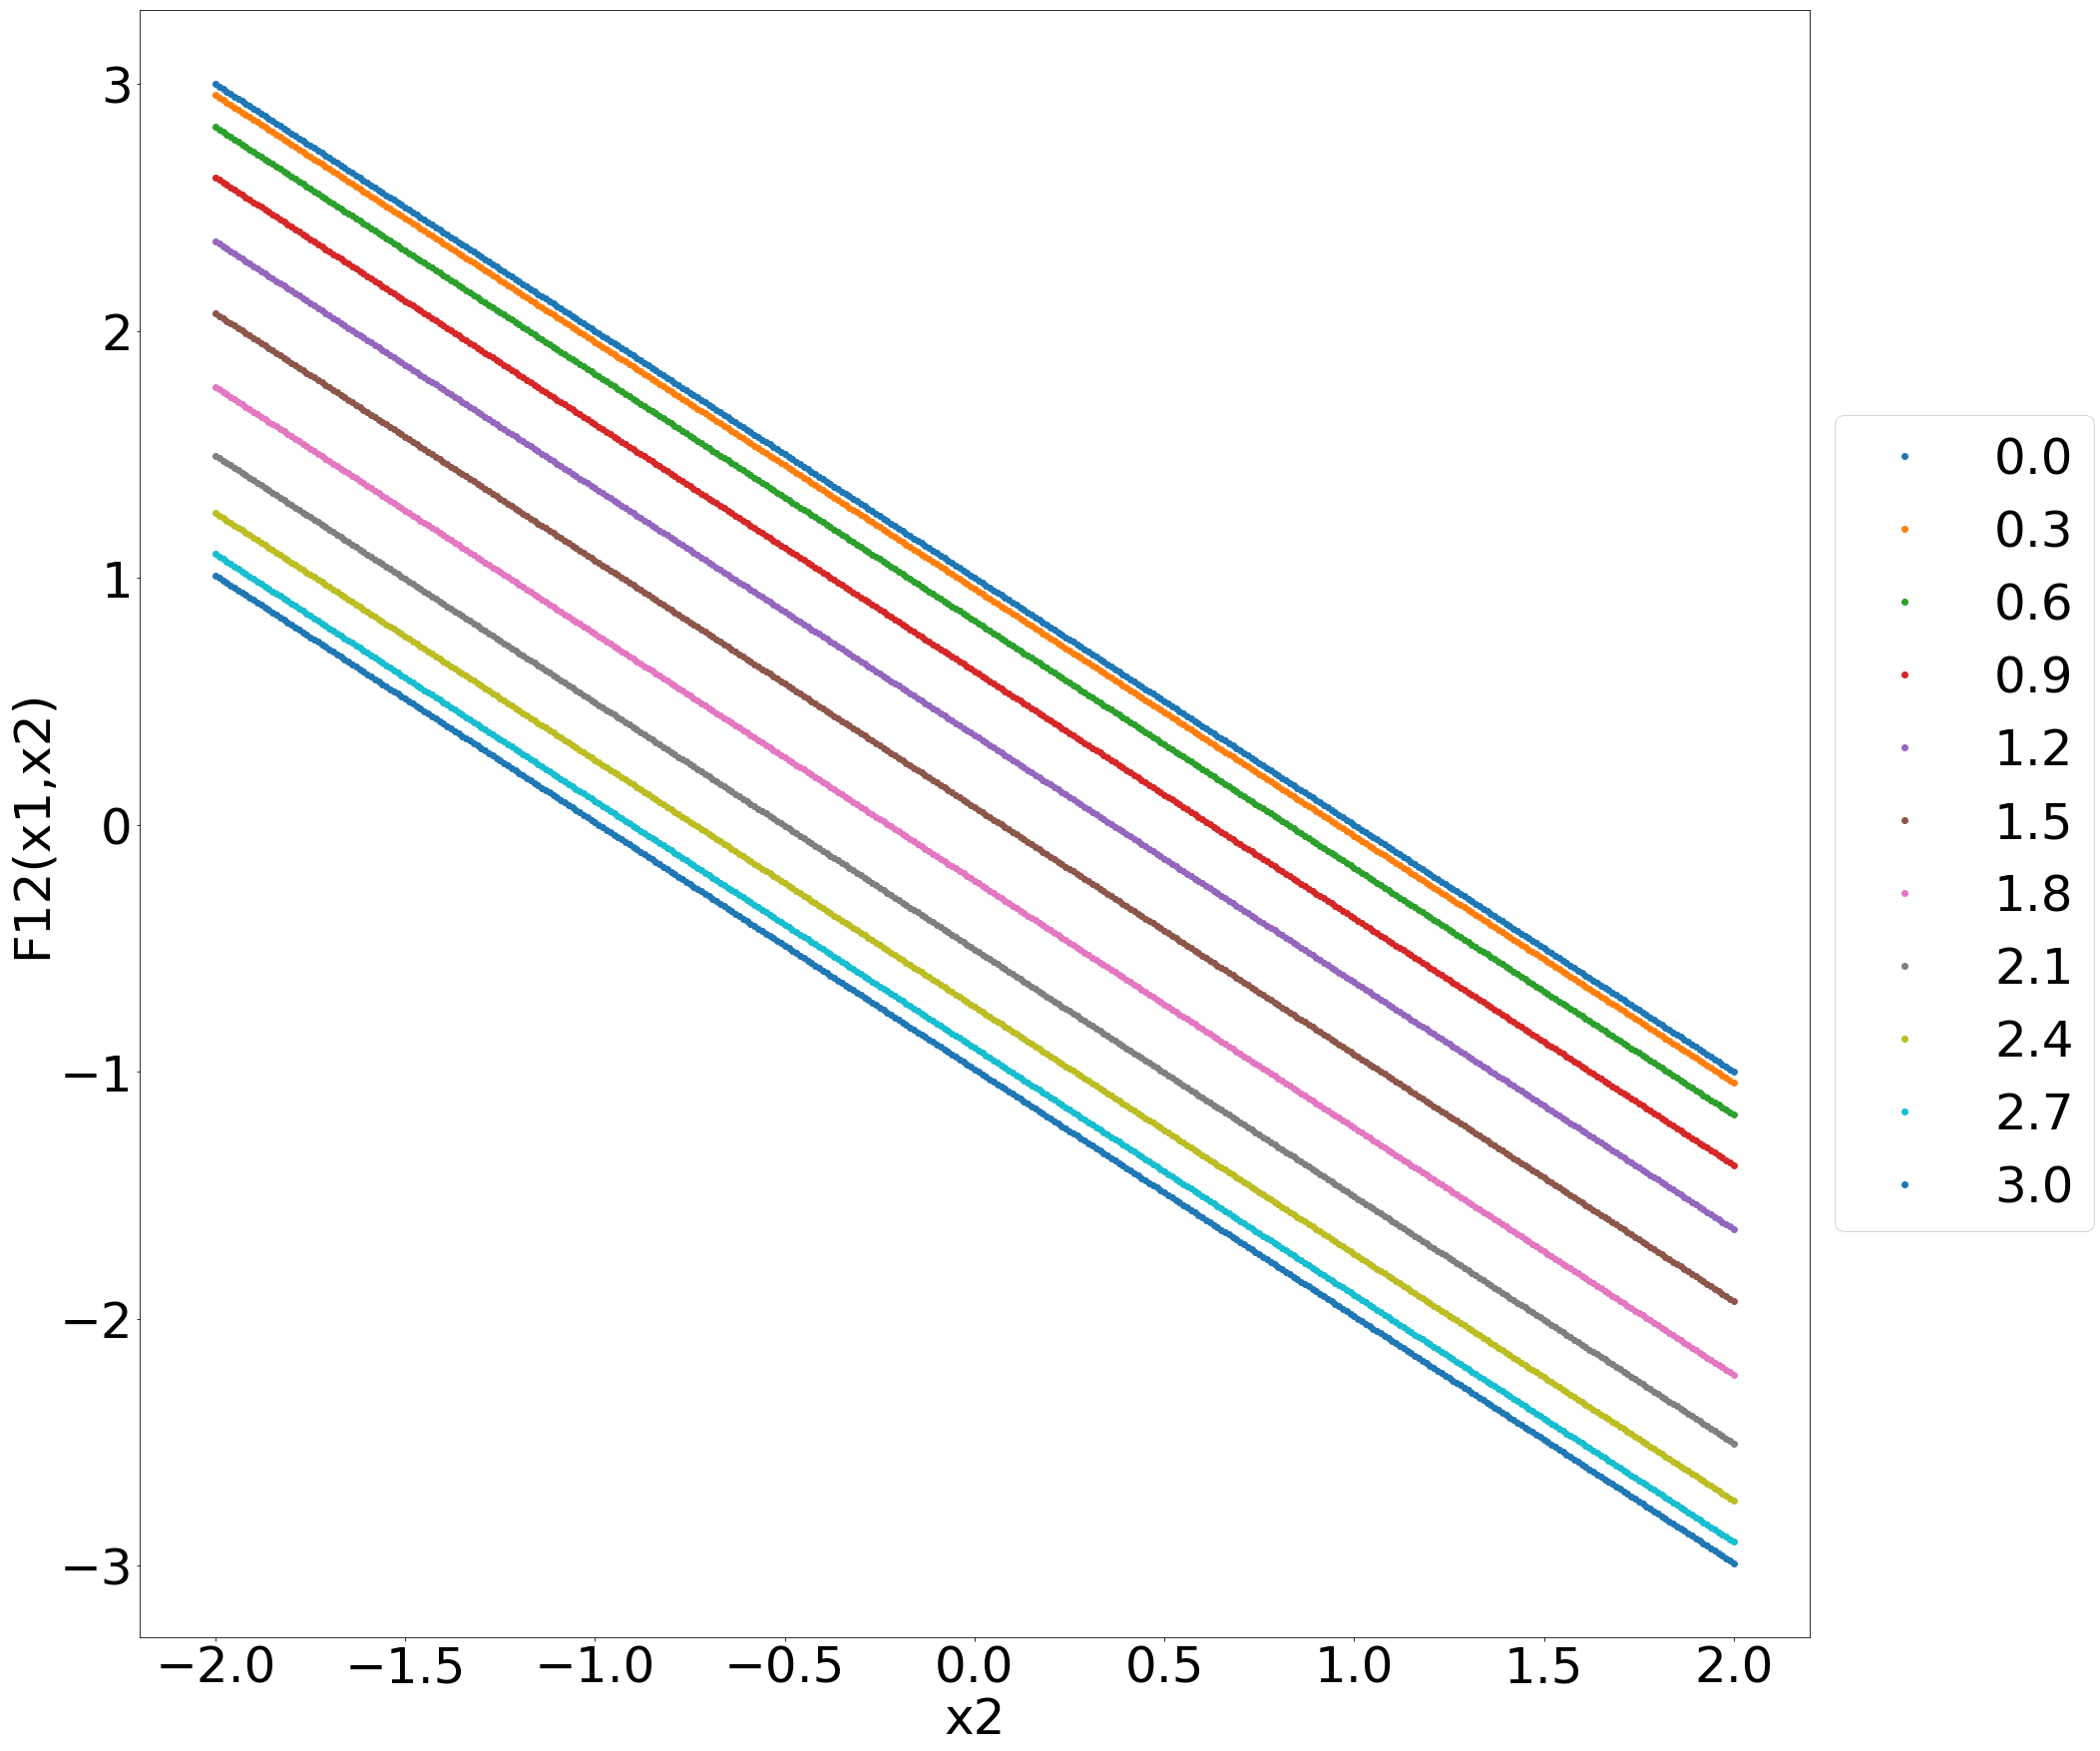

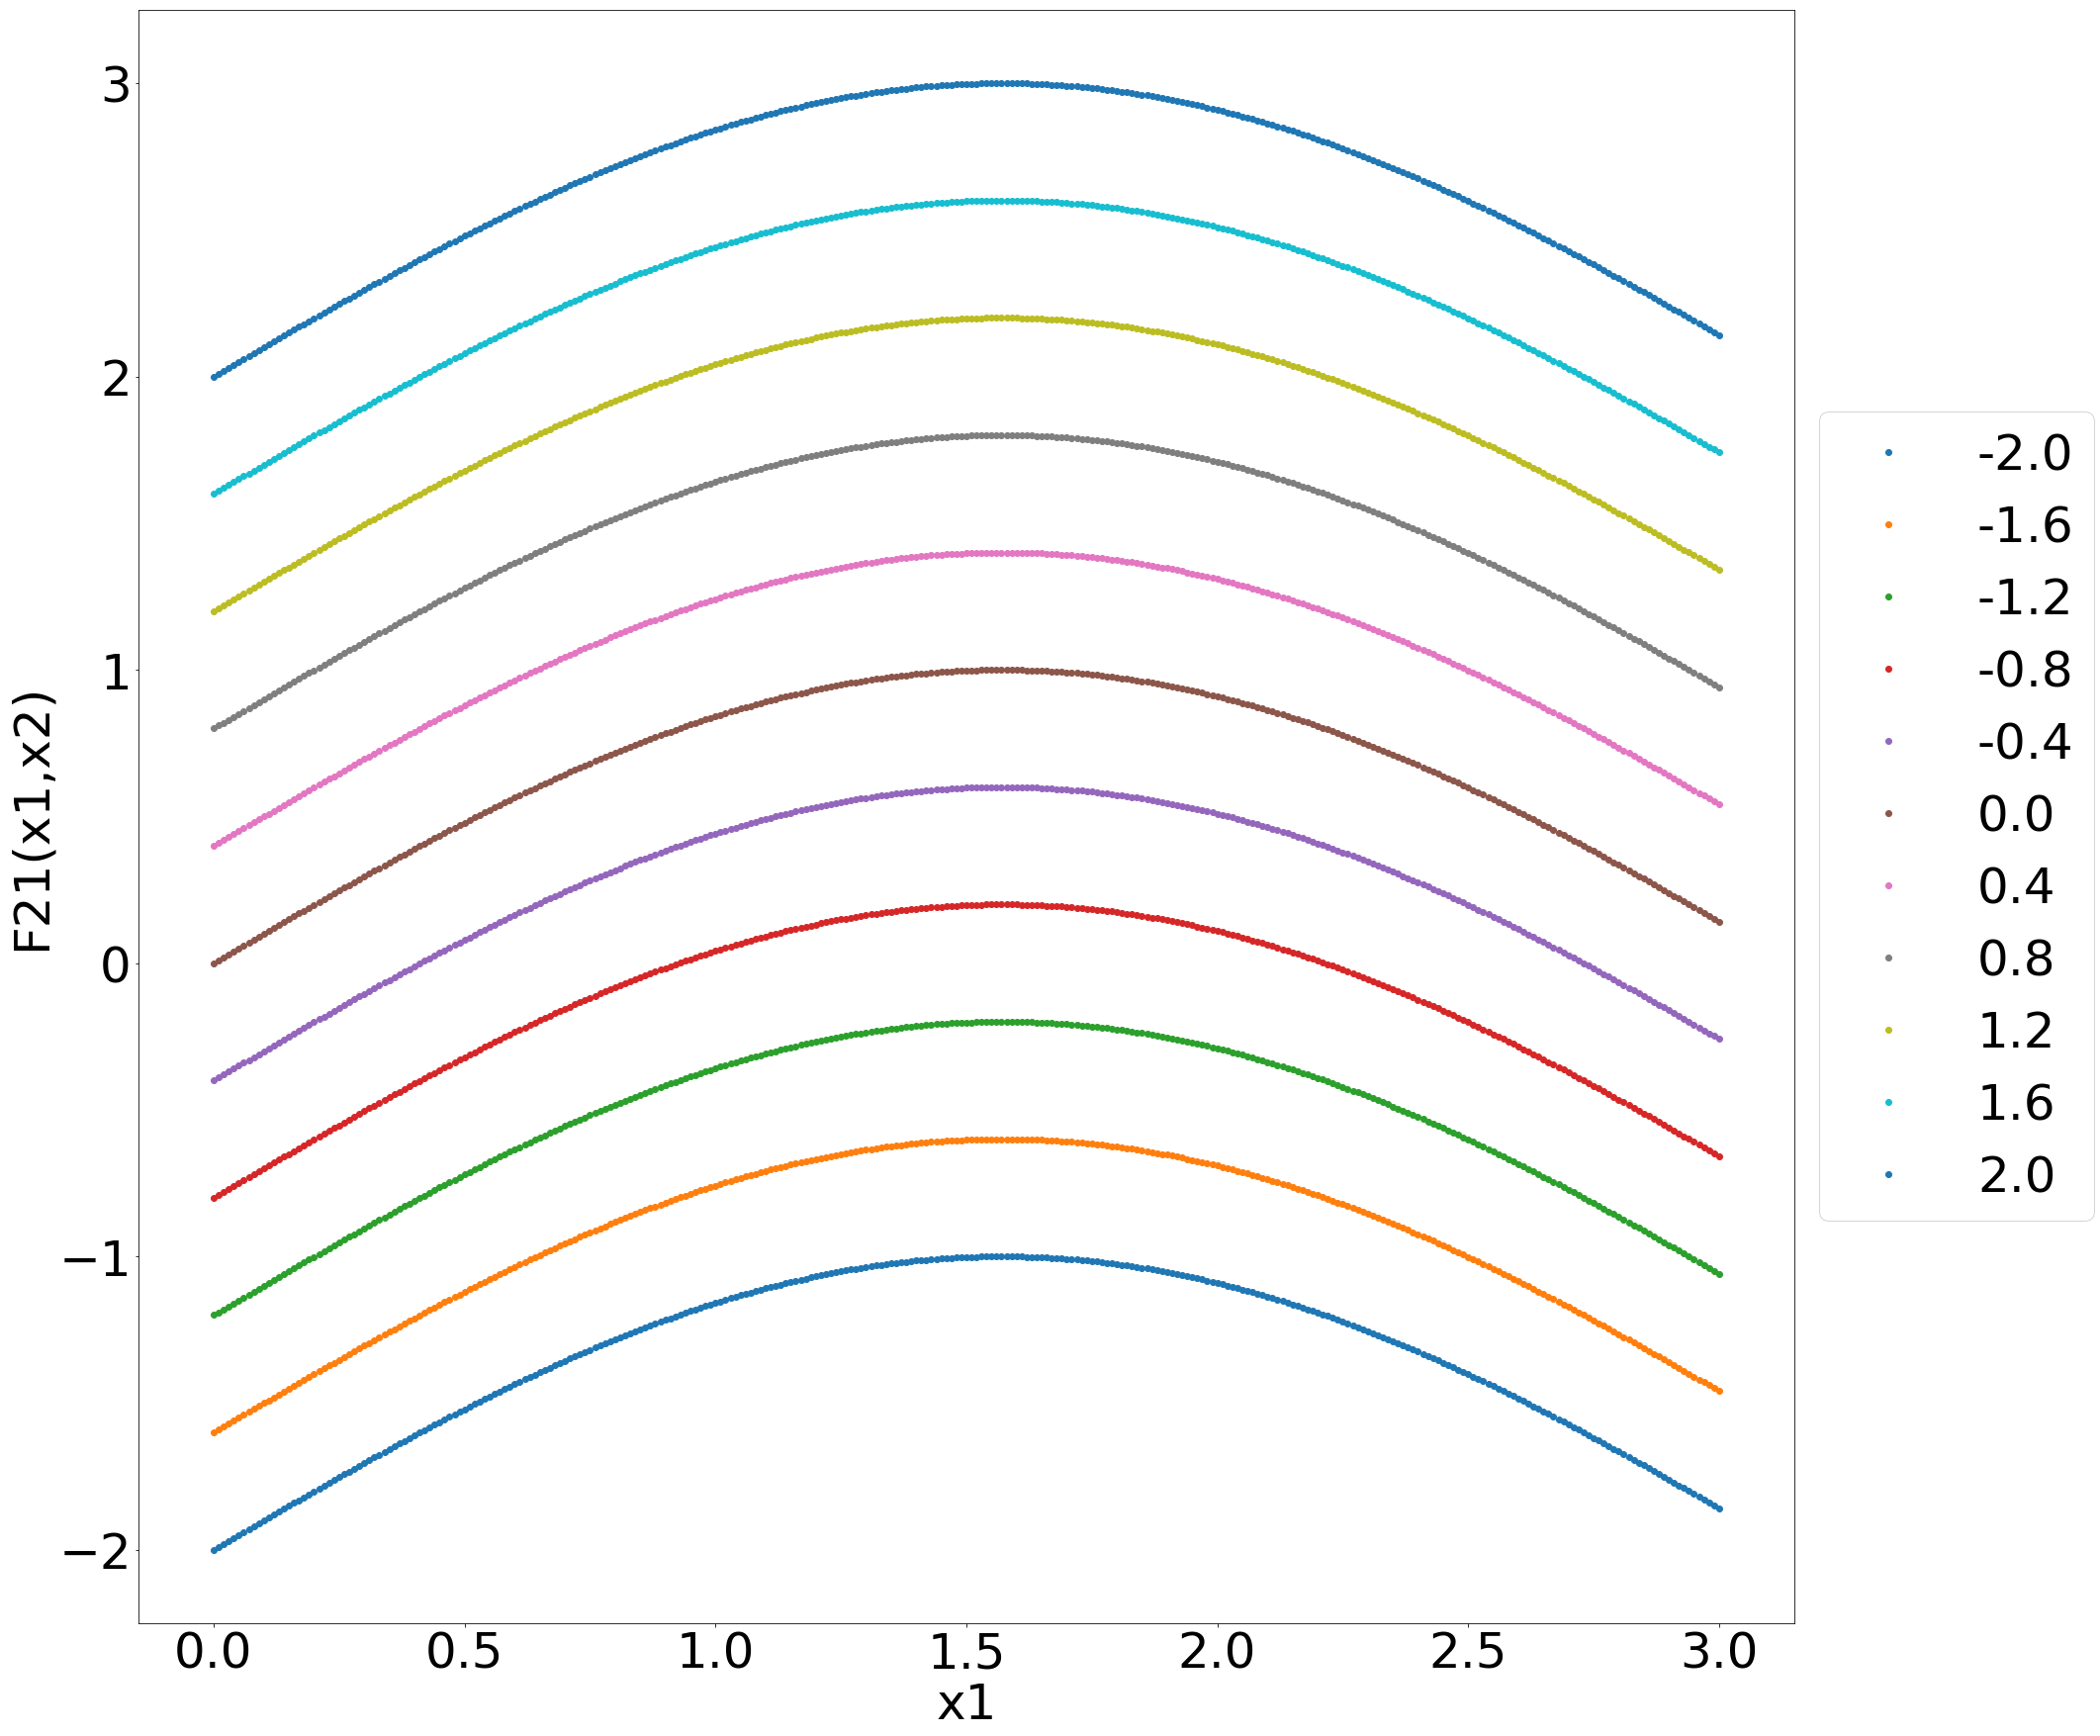

<function matplotlib.pyplot.close>

In [102]:
matplotlib.rcParams.update({'font.size': 50})
fst = o.itemgetter(0)
snd = o.itemgetter(1)

plt.figure(figsize=(30, 30))
for splt in ([(x,y) for y in x2] for x in every(30, sorted(x1))):
    plt.plot(list(map(snd, splt)), list(map(F12, splt)),'o', label=str(round(splt[0][0],3)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x2')
plt.ylabel('F12(x1,x2)')
plt.show()
plt.close()
plt.figure(figsize=(30, 30))
for splt in ([(x,y) for y in x1] for x in every(40, sorted(x2))):
    plt.plot(list(map(snd, splt)), list(map(F211, splt)),'o', label=str(round(splt[0][0],3)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('F21(x1,x2)')
plt.show()
plt.close


#### Частини задачі 2 і 3

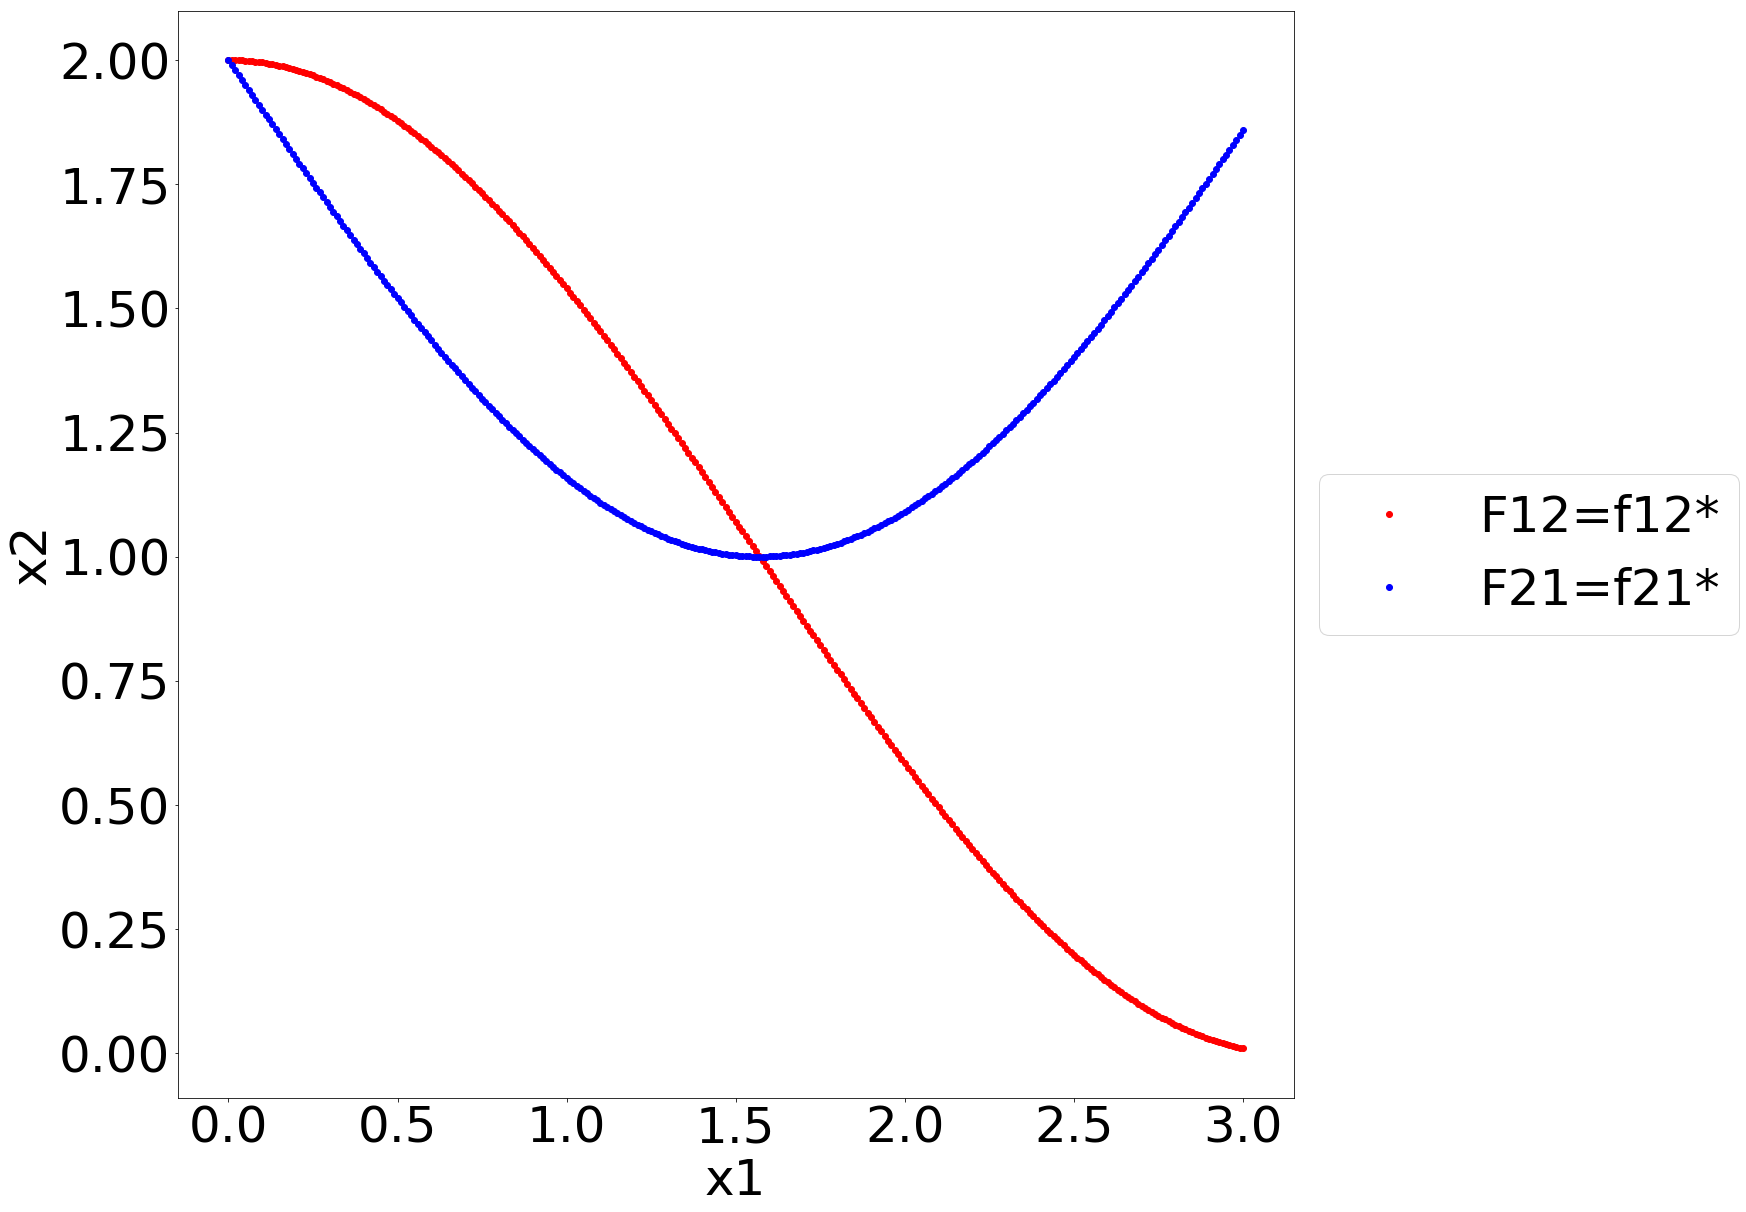

In [114]:
#These functions will give back valus of x2
def getf1(x,y):
    return m.cos(x) + 1 + y
def getf2(x,y):
    return 2 - m.sin(x) + y
'''
plt.figure(figsize=(20, 20))
valx = [x for x in sorted(x1)]
valy1 = [getf1(y,0) for y in valx]
valy2 = [getf2(y,0) for y in valx]
plt.plot(valx, valy1,'o', label="F12=f12*")
plt.fill_between(valx, valy1,0,facecolor='blue', interpolate=True,label="F12>f12*")
plt.fill_between(valx, valy1,2,facecolor='red', interpolate=True,label="F12<f12*")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
plt.close()

plt.figure(figsize=(20, 20))
plt.plot(valx, valy2,'go', label="F21=f21*")
plt.fill_between(valx, valy2,0,facecolor='red', interpolate=True,label="F21<f21*")
plt.fill_between(valx, valy2,2,facecolor='blue', interpolate=True,label="F21>f21*")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
plt.close()
'''
plt.figure(figsize=(20, 20))
plt.plot(valx, valy1,'ro', label="F12=f12*")
plt.plot(valx, valy2,'bo', label="F21=f21*")
valx=np.array(valx)
valx=np.array(valx)
valy1=np.array(valy1)
valy1=np.array(valy1)

#plt.fill_between(valx, valy1, valy2, where =valx<=1.6 ,facecolor='green', interpolate=True,label="область Парето")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
plt.close()



#### Оптимальне значення:

In [113]:


delta_i = lambda x: max(abs(F12(x) - f12[0]), abs(F21(x) - f21[0]))
delta = min(it.product(x1, x2), key=lambda x: delta_i(x))

print("Оптимальные значения x1* и x2*:")
print("x1* = "+str(delta[0])+ "\nx2* = "+str(delta[1]))


Оптимальные значения x1* и x2*:
x1* = 0.0
x2* = 2.0
